<a href="https://colab.research.google.com/github/Orion-AI-Lab/mesogeos/blob/main/notebooks/1_Exploring_Mesogeos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Mesogeos Cube

## Steps needed to access the dataset from google drive



1. Add the dataset's [Drive link](https://drive.google.com/drive/folders/1aRXQXVvw6hz0eYgtJDoixjPQO-_bRKz9) to your shortcuts in Google Drive.

2. Then you can use the shortcut path to open the dataset.

NOTE: For reference, our path in this notebook is `orionlab_datasets/mesogeos`, so after we mount `/content/drive` the dataset will be in `/content/drive/MyDrive/orionlab_datasets/mesogeos/mesogeos.zarr`.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install zarr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 85.3 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=0cdaf5726739c7d4acc27d3a2357af5f40c48b76de9c1028f0abf23807d4d431
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [ ]:
import xarray as xr

In [ ]:
ds = xr.open_zarr('/content/drive/MyDrive/orionlab_datasets/mesogeos/mesogeos_cube.zarr/')

In [ ]:
ds

<xarray.Dataset>
Dimensions:               (y: 1752, x: 4714, time: 6026)
Coordinates:
  * time                  (time) datetime64[ns] 2006-04-01 ... 2022-09-29
  * x                     (x) float64 -10.72 -10.71 -10.7 ... 36.72 36.73 36.74
  * y                     (y) float64 47.7 47.69 47.68 ... 30.09 30.08 30.07
Data variables: (12/30)
    aspect                (y, x) float32 dask.array<chunksize=(1752, 4714), meta=np.ndarray>
    burned_areas          (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>
    curvature             (y, x) float32 dask.array<chunksize=(1752, 4714), meta=np.ndarray>
    d2m                   (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>
    dem                   (y, x) float32 dask.array<chunksize=(1752, 4714), meta=np.ndarray>
    ignition_points       (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>
    ...                    ...
    spatial_ref           int64 ...
    ssrd                  (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>
    t2m                   (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>
    tp                    (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>
    wind_direction        (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>
    wind_speed            (time, y, x) float32 dask.array<chunksize=(1, 1752, 4714), meta=np.ndarray>

CPU times: user 1.12 s, sys: 165 ms, total: 1.29 s
Wall time: 53.8 s


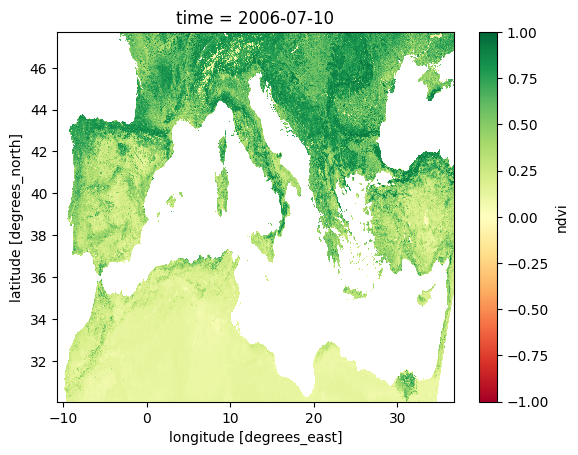

In [ ]:
%%time
# plot the ndvi for the 100th day in the dataset for the whole Mediterranean
ds.isel(time=100).ndvi.plot(cmap="RdYlGn", vmax=1, vmin=-1)

CPU times: user 14.6 s, sys: 1.87 s, total: 16.5 s
Wall time: 2min 4s


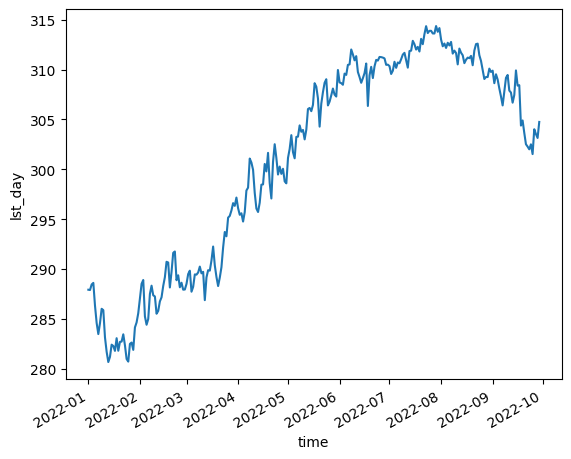

In [ ]:
%%time
# plot the time-series of the average land surface temperature of the year 2022
ds.sel(time=slice('2022-01-01', None)).lst_day.mean(dim=('x', 'y')).plot()